# <center>Credit Card Fraud Detection</center>

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Load the Sample Data

Data column explanations/definitions

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset.index.Class = None
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Check Column & Row Contents

In [3]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
dataset.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [6]:
dataset = dataset.drop_duplicates()
dataset.count()

Time      283726
V1        283726
V2        283726
V3        283726
V4        283726
V5        283726
V6        283726
V7        283726
V8        283726
V9        283726
V10       283726
V11       283726
V12       283726
V13       283726
V14       283726
V15       283726
V16       283726
V17       283726
V18       283726
V19       283726
V20       283726
V21       283726
V22       283726
V23       283726
V24       283726
V25       283726
V26       283726
V27       283726
V28       283726
Amount    283726
Class     283726
dtype: int64

In [7]:
dataset.isnull().values.sum()

0

In [8]:
dataset.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [9]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


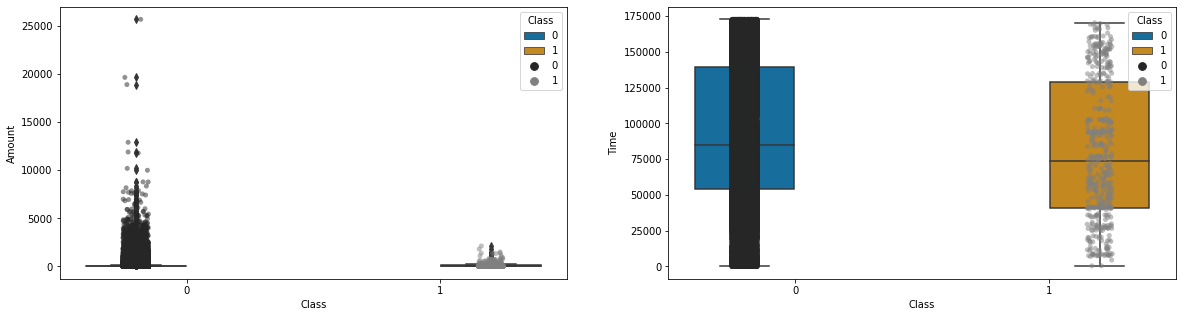

In [10]:
cols = ['Amount', 'Time']
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
for index,col in enumerate(cols):
    sns.boxplot(x="Class", y=col, hue="Class", palette="colorblind", data=dataset, ax=axes[index]) 
    sns.stripplot(x='Class', y=col,  data=dataset,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,color='grey',hue='Class')
plt.show()
plt.clf()
plt.close()

<AxesSubplot:xlabel='Amount', ylabel='Class'>

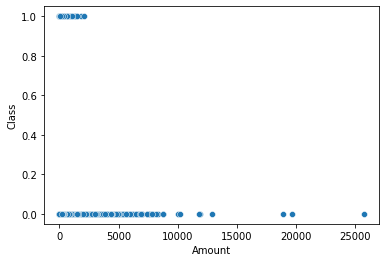

In [11]:
sns.scatterplot(x="Amount", y="Class",data=dataset)

<AxesSubplot:>

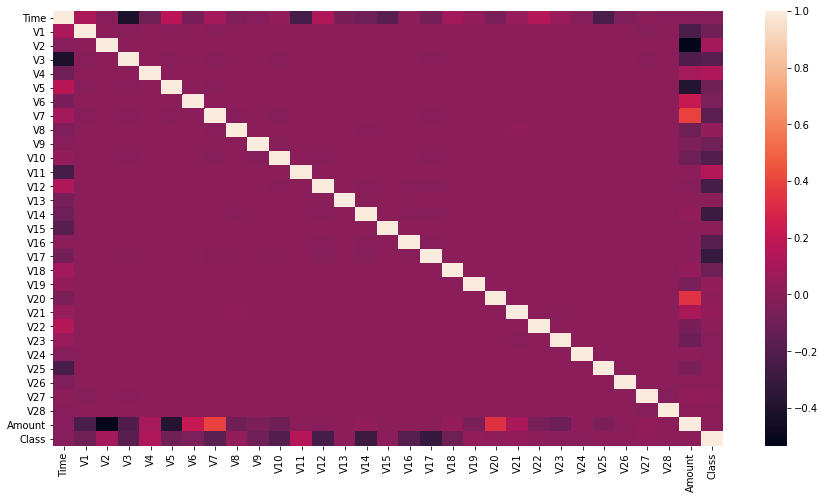

In [12]:
f, ax = plt.subplots(figsize=(15, 8))
corr = dataset.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Separating Label and Features
<p>X for all features and y for consecutive labels </p>

In [13]:
X = dataset.iloc[:,29:-1].values
y = dataset.iloc[:,30].values

### Separating Test and Train Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Checking with imbalance dataset

In [15]:
clf_knn = KNeighborsClassifier(n_neighbors=32)
knn_fit = clf_knn.fit(X_train, y_train)
knn_predict = clf_knn.predict(X_test)

knn_accuracy_score = accuracy_score(y_test, knn_predict)
print("Accuracy score: {:.2f}".format(knn_accuracy_score*100))

Accuracy score: 99.83


In [16]:
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp_fit = clf_mlp.fit(X_train, y_train)
mlp_predict = clf_mlp.predict(X_test)

mlp_accuracy_score = accuracy_score(y_test, mlp_predict)
print("Accuracy score: {:.2f}".format(mlp_accuracy_score*100))

Accuracy score: 99.83


In [17]:
clf_rfc = RandomForestClassifier(max_depth=2, random_state=1)
rfc_fit = clf_rfc.fit(X_train, y_train)
rfc_predict = clf_rfc.predict(X_test)

rfc_accuracy_score = accuracy_score(y_test, rfc_predict)
print("Accuracy score: {:.2f}".format(rfc_accuracy_score*100))

Accuracy score: 99.83


In [18]:
clf_xgb = XGBClassifier()
xgb_fit = clf_xgb.fit(X_train, y_train)
xgb_predict = clf_xgb.predict(X_test)

xgb_accuracy_score = accuracy_score(y_test, xgb_predict)
print("Accuracy score: {:.2f}".format(xgb_accuracy_score*100))

[21:34:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\raihan\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy score: 99.83


### Undersampling with minority class

In [19]:
data_group = dataset.groupby('Class')
dataset = data_group.apply(lambda x: x.sample(data_group.size().min()).reset_index(drop=True))

X = dataset.iloc[:,29:-1].values
y = dataset.iloc[:,30].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Checking with balance dataset

In [20]:
clf_knn = KNeighborsClassifier(n_neighbors=32)
knn_fit = clf_knn.fit(X_train, y_train)
knn_predict = clf_knn.predict(X_test)

knn_accuracy_score = accuracy_score(y_test, knn_predict)
print("Accuracy score: {:.2f}".format(knn_accuracy_score*100))

Accuracy score: 70.42


In [21]:
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp_fit = clf_mlp.fit(X_train, y_train)
mlp_predict = clf_mlp.predict(X_test)

mlp_accuracy_score = accuracy_score(y_test, mlp_predict)
print("Accuracy score: {:.2f}".format(mlp_accuracy_score*100))

Accuracy score: 67.61


In [22]:
clf_rfc = RandomForestClassifier(max_depth=2, random_state=1)
rfc_fit = clf_rfc.fit(X_train, y_train)
rfc_predict = clf_rfc.predict(X_test)

rfc_accuracy_score = accuracy_score(y_test, rfc_predict)
print("Accuracy score: {:.2f}".format(rfc_accuracy_score*100))

Accuracy score: 69.37


In [23]:
clf_xgb = XGBClassifier()
xgb_fit = clf_xgb.fit(X_train, y_train)
xgb_predict = clf_xgb.predict(X_test)

xgb_accuracy_score = accuracy_score(y_test, xgb_predict)
print("Accuracy score: {:.2f}".format(xgb_accuracy_score*100))

[21:34:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 66.20


c:\users\raihan\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
